In [1]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

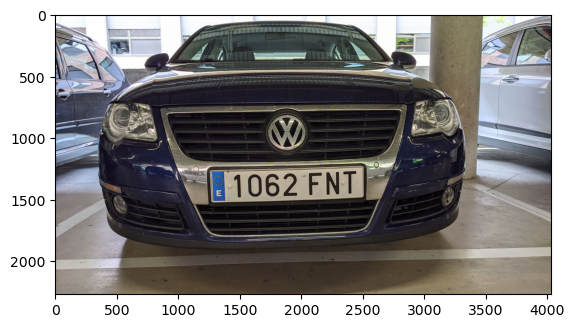

In [4]:
img = cv2.imread('/media/eric/D/repos/ANPR-GIA/Test/Frontal/Frontal/1062FNT.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# GRAY

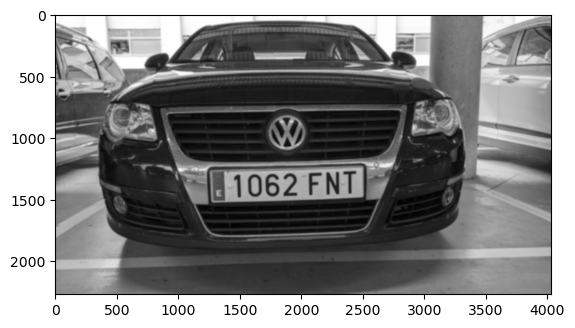

In [53]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (31, 31), 0)
plt.imshow(gray, cmap='gray')

# BLACKHAT

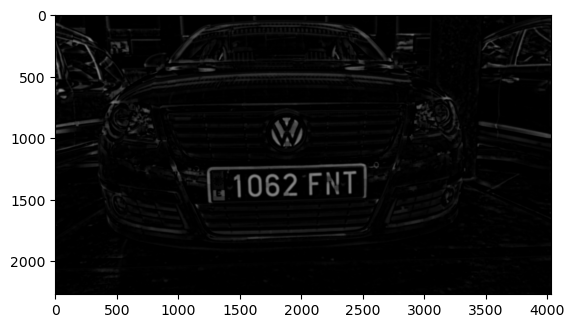

In [56]:
structuring_element = np.zeros((40, 40), np.uint8)
structuring_element[1:-1, 1:-1] = 1
black_hat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuring_element)
plt.imshow(black_hat, cmap="gray", vmin=0, vmax=255)

# OPEN

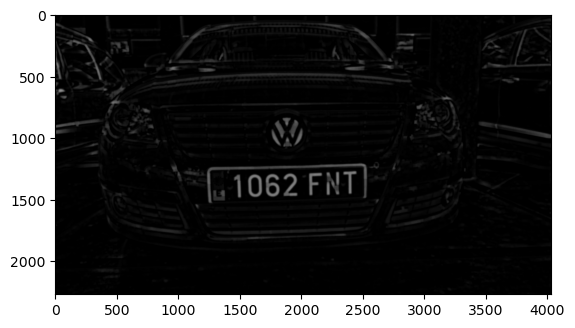

In [70]:
# open
structuring_element = np.zeros((10, 10), np.uint8)
structuring_element[1:-1, 1:-1] = 1
open = cv2.morphologyEx(black_hat, cv2.MORPH_OPEN, structuring_element)
plt.imshow(open, cmap="gray", vmin=0, vmax=255)

In [62]:
open == black_hat

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True]])

# OTSU

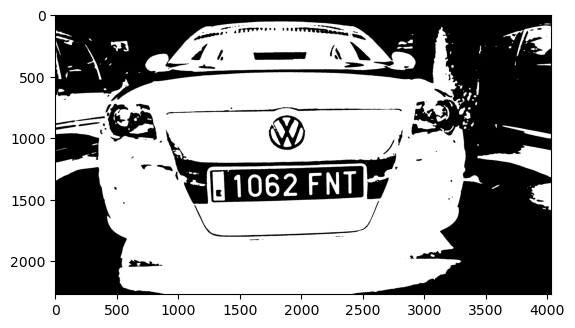

In [67]:
otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(otsu[1], cmap='gray')

# EDGE DETECTION

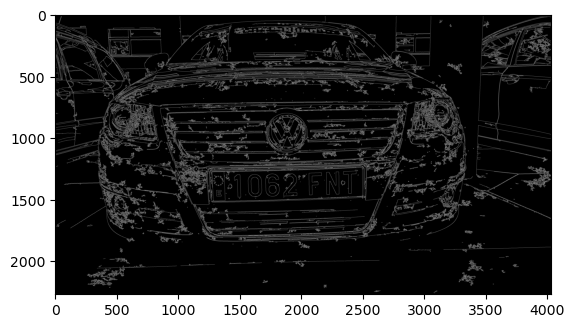

In [38]:
# use canny edge detection
edges = cv2.Canny(gray, 0, 255)
plt.imshow(edges, cmap='gray')

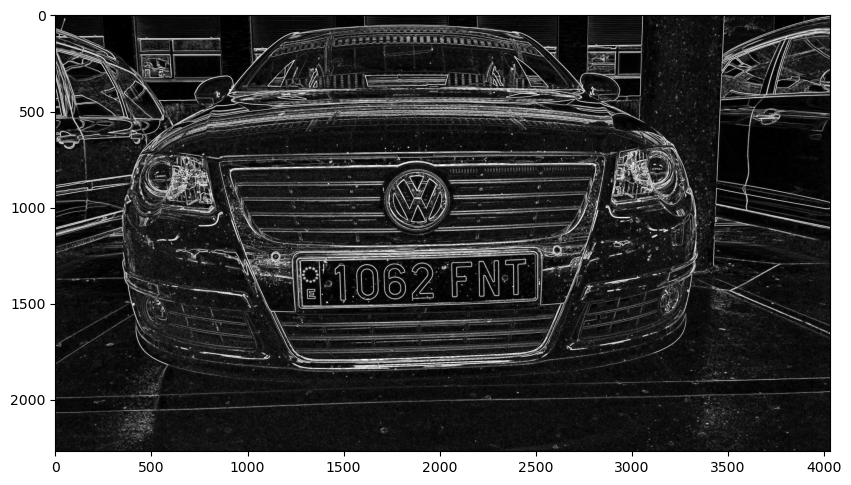

In [47]:
# use sobel edge detection
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)
sobel = np.clip(sobel, 0, 255).astype(np.uint8)
plt.figure(figsize=(10, 15))
plt.imshow(sobel, cmap='gray')

# RECTANGLE BLOBS

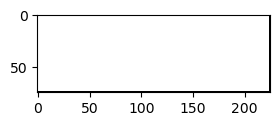

In [74]:
rect_structuring_element = np.zeros((75, 225), np.uint8)
rect_structuring_element[1:-1, 1:-1] = 1
plt.figure(figsize=(3, 5))
plt.imshow(rect_structuring_element, cmap="gray", vmin=0, vmax=1)

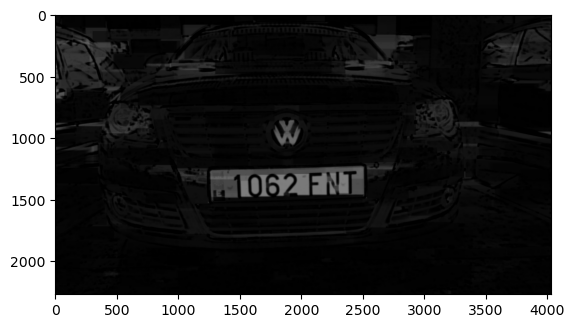

In [75]:
rect_black_hat = cv2.morphologyEx(open, cv2.MORPH_BLACKHAT, rect_structuring_element)
plt.imshow(rect_black_hat, cmap="gray", vmin=0, vmax=255)

In [ ]:
# mirar esto tambien
cv2.findContours